# Resumen

El módulo [sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) implementa funciones que evalúan el error de predicción para clasificación, regresión y agrupamiento (clustering).

Puede consultar la documentación de scikit-learn si se requiere más información sobre "[*Métricas y puntuación: cuantificación de la calidad de las predicciones*](https://scikit-learn.org/stable/modules/model_evaluation.html)".

En este cuaderno, veremos algunas de las métricas que scikit-learn proporciona para [clasificación](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics) y también escribiremos nuestras propias funciones desde cero para comprender la matemática detrás de algunas de ellas.

# Introducción

Imagina un estudio que evalúa una prueba que examina a las personas en busca de una enfermedad. Cada persona que realiza la prueba o tiene o no tiene la enfermedad. El resultado de la prueba puede ser positivo (clasificando a la persona como portadora de la enfermedad) o negativo (clasificando a la persona como no portadora de la enfermedad). Por lo tanto, podemos agrupar a las personas en estudio en uno de los cuatro grupos siguientes:

- **Verdadero positivo (VP)**: Personas enfermas (actual = 1) identificadas correctamente como enfermas (predicho = 1)
- **Falso positivo (FP)**: Personas sanas (actual = 0) identificadas incorrectamente como enfermas (predicho = 1)
- **Verdadero negativo (VN)**: Personas sanas (actual = 0) identificadas correctamente como sanas (predicho = 0)
- **Falso negativo (FN)**: Personas enfermas (actual = 1) identificadas incorrectamente como sanas (predicho = 0)

Estos cuatro grupos se pueden representar en la siguiente figura (extraída de [aquí](https://towardsdatascience.com/understanding-data-science-classification-metrics-in-scikit-learn-in-python-3bc336865019)).


<img src="https://miro.medium.com/max/407/1*2WBrkJP8qKO3DDG7Lvg0hg.png">

En la figura anterior, se pueden ver:
- Todas las muestras que tienen la condición (por ejemplo, tener la enfermedad): Verdaderos positivos + Falsos negativos (parte derecha de la imagen)
- Todas las muestras que no tienen la condición (por ejemplo, no tener la enfermedad): Verdaderos negativos + Falsos positivos (parte izquierda de la imagen)

La figura anterior también se puede mostrar utilizando una matriz de confusión, como se muestra a continuación:

<img src="https://raw.githubusercontent.com/albertofernandezvillan/computer-vision-and-deep-learning-course/main/assets/confusion_matrix.png">

Usando VP, FP, FN y VN, podemos calcular algunas métricas: sensibilidad (o recuperación), especificidad y precisión.

**Sensibilidad** es una medida de qué tan bien una prueba puede **identificar verdaderos positivos**. La sensibilidad también puede referirse como **recuperación (recall)**, tasa de aciertos o **tasa de verdaderos positivos**. Es el porcentaje, o proporción, de verdaderos positivos de todas las muestras que tienen la condición (verdaderos positivos y falsos negativos). Se puede ver como "*qué tan seguro estás de no perder ningún positivo*".

**Especificidad** es una medida de qué tan bien una prueba puede **identificar verdaderos negativos**. La especificidad también se refiere como selectividad o **tasa de verdaderos negativos**, y es el porcentaje, o proporción, de los verdaderos negativos de todas las muestras que no tienen la condición (verdaderos negativos y falsos positivos).

**Precisión** es intuitivamente la capacidad del clasificador de no etiquetar como positiva una muestra que es negativa. La precisión también puede referirse como valores predictivos positivos (VPP). Es la proporción de resultados positivos que son verdaderos positivos. La precisión se puede ver como "*qué tan seguro estás de tus verdaderos positivos*".



# Implementación de nuestras propias funciones proporcionando las principales métricas para clasificación

Podemos codificar nuestras propias funciones de evaluación utilizando solo NumPy. En primer lugar, tenemos que calcular VP, FN, FP y VN. Luego, y con base a estas métricas, podemos calcular la matriz de confusión, sensibilidad, especificidad, precisión, recuperación(recall) y puntuación F1 (F1-Score). Más adelante, veremos cómo aplicar estas funciones con fines de evaluación y también compararemos los resultados con las métricas y funciones de puntuación incluidas en el módulo [sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

In [ ]:
import numpy as np

def find_TP(y_true, y_pred):
  # counts the number of true positives (y_true = 1, y_pred = 1)
  return sum((y_true == 1) & (y_pred == 1))

def find_FN(y_true, y_pred):
  # counts the number of false negatives (y_true = 1, y_pred = 0)
  return sum((y_true == 1) & (y_pred == 0))

def find_FP(y_true, y_pred):
  # counts the number of false positives (y_true = 0, y_pred = 1)
  return sum((y_true == 0) & (y_pred == 1))

def find_TN(y_true, y_pred):
  # counts the number of true negatives (y_true = 0, y_pred = 0)
  return sum((y_true == 0) & (y_pred == 0))

def find_conf_matrix_values(y_true,y_pred):
  # calculate TP, FN, FP, TN
  TP = find_TP(y_true,y_pred)
  FN = find_FN(y_true,y_pred)
  FP = find_FP(y_true,y_pred)
  TN = find_TN(y_true,y_pred)
  return TP,FN,FP,TN

def my_confusion_matrix(y_true, y_pred):
  TP,FN,FP,TN = find_conf_matrix_values(y_true,y_pred)
  return np.array([[TN,FP],[FN,TP]])

def my_accuracy_score(y_true, y_pred):
  # calculates the fraction of samples predicted correctly
  TP,FN,FP,TN = find_conf_matrix_values(y_true,y_pred)
  return (TP + TN)/(TP + FN + FP + TN)

def my_recall_score(y_true, y_pred):
  # True positive rate (TPR), recall, sensitivity
  # calculates the fraction of positive samples predicted correctly
  TP,FN,FP,TN = find_conf_matrix_values(y_true,y_pred)
  return TP / (TP + FN)

def my_precision_score(y_true, y_pred):
  # calculates the fraction of predicted positives samples that are actually positive
  TP,FN,FP,TN = find_conf_matrix_values(y_true,y_pred)
  return TP / (TP + FP)

# tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
# specificity = tn / (tn+fp)
def my_specificity_score(y_true, y_pred):
  # Specificity, selectivity, true negative rate (TNR)
  # Calculates the fraction of negatives that are correctly identified
  TP,FN,FP,TN = find_conf_matrix_values(y_true,y_pred)
  return TN / (TN + FP)

def my_f1_score(y_true, y_pred):
  # calculates the F1 score
  recall = my_recall_score(y_true,y_pred)
  precision = my_precision_score(y_true,y_pred)
  return 2 * (precision * recall) / (precision + recall)

def show_metric(my_metric):
  return "{:.2f}%".format(my_metric * 100)

En este punto, vamos a mostrar ejemplos de muestra para introducir todas las métricas y funciones de puntuación definidas anteriormente. Estos ejemplos se extraen [de este tutorial](https://towardsdatascience.com/should-i-look-at-precision-recall-or-specificity-sensitivity-3946158aace1).

<img align="left"  src ="https://raw.githubusercontent.com/albertofernandezvillan/computer-vision-and-deep-learning-course/main/assets/pencil.jpg" width=40 px>

Puede revisar y completar este cuaderno con los ejemplos faltantes incluidos en el tutorial mencionado anteriormente.

## Ejemplo 1 — Low Precision, High Recall, and High Specificity

<img src="https://miro.medium.com/max/700/1*btcfBuM5Eqqc6rJ3iw3sNQ.png" width=600>

In [ ]:
import numpy as np

y_true = np.array([1,0,0,0,0,0,0,0,0,0])
y_pred = np.array([1,1,1,0,0,0,0,0,0,0])

print("precision: {}".format(show_metric(my_precision_score(y_true, y_pred))))
print("recall: {}".format(show_metric(my_recall_score(y_true, y_pred))))
print("specificity: {}".format(show_metric(my_specificity_score(y_true, y_pred))))
print("accuracy: {}".format(show_metric(my_accuracy_score(y_true, y_pred))))
print("F1 score: {}".format(show_metric(my_f1_score(y_true, y_pred))))

precision: 33.33%
recall: 100.00%
specificity: 77.78%
accuracy: 80.00%
F1 score: 50.00%


Por supuesto, aquí tienes la interpretación de los resultados proporcionados:

- **Precisión (Precision):** 33.33%. Este resultado indica que de todas las instancias clasificadas como positivas, solo el 33.33% fue clasificado correctamente.

- **Recuperación (Recall):** 100.00%. Este resultado indica que de todas las instancias que eran positivas, el 100.00% fue identificado correctamente. Es decir, el clasificador no dejó pasar ningún caso positivo.

- **Especificidad (Specificity):** 77.78%. Esto sugiere que de todas las instancias que eran negativas, el 77.78% fue identificado correctamente. Por lo tanto, hay un 22.22% de instancias negativas que fueron incorrectamente clasificadas como positivas.

- **Exactitud (Accuracy):** 80.00%. Esto implica que el 80.00% de todas las predicciones realizadas por el modelo fueron correctas. Es una medida general de la precisión del modelo, considerando tanto las predicciones positivas como negativas.

- **Puntuación F1 (F1 Score):** 50.00%. Esta es una medida del equilibrio entre precisión y recuperación. Indica que el modelo tiene un rendimiento moderado en términos de equilibrar tanto la precisión como el recall.



La puntuación F1 es una métrica comúnmente utilizada en la evaluación de modelos de clasificación. Es una medida que combina la precisión y la recuperación del modelo en un solo número, lo que proporciona una forma de evaluar el equilibrio entre la precisión y el recall.

La puntuación F1 se calcula utilizando la siguiente fórmula:

F1 = 2 * (Precision * Recall) / (Precision + Recall)

Donde:
- La precisión se refiere a la proporción de verdaderos positivos entre todas las instancias clasificadas como positivas por el modelo.
- El recall se refiere a la proporción de verdaderos positivos entre todas las instancias que realmente son positivas en el conjunto de datos.

La puntuación F1 es útil cuando hay un desequilibrio entre las clases de los datos, lo que significa que puede haber muchas más instancias de una clase que de otra. Ayuda a tener una visión más completa del rendimiento del modelo al considerar tanto los falsos positivos como los falsos negativos.

Al utilizar la puntuación F1, se busca un equilibrio entre la precisión y el recall, lo que significa que se penaliza a los modelos que tienen una precisión o un recall extremadamente bajos. Una puntuación F1 alta indica un equilibrio sólido entre la precisión y el recall, lo que sugiere un mejor rendimiento del modelo en general.

Si tienes más preguntas o necesitas más aclaraciones, no dudes en preguntar.

Si el clasificador predice negativo, puedes confiar en él, el ejemplo es negativo. Sin embargo, presta atención, si el ejemplo es negativo, no puedes estar seguro de que lo prediga como negativo (especificidad = 78%).

Si el clasificador predice positivo, no puedes confiar en él (precisión = 33%). Sin embargo, si el ejemplo es positivo, puedes confiar en el clasificador (recall = 100%).

## Ejemplo 2 — High Precision, High Recall, and Low Specificity

<img src="https://miro.medium.com/max/2400/1*5tE354A0ULFcQJBB0iroLQ.png" width=600>

In [ ]:
import numpy as np

y_true = np.array([0,1,1,1,1,1,1,1,1,1])
y_pred = np.array([1,1,1,1,1,1,1,1,1,1])

print("precision: {}".format(show_metric(my_precision_score(y_true, y_pred))))
print("recall: {}".format(show_metric(my_recall_score(y_true, y_pred))))
print("specificity: {}".format(show_metric(my_specificity_score(y_true, y_pred))))
print("accuracy: {}".format(show_metric(my_accuracy_score(y_true, y_pred))))
print("F1 score: {}".format(show_metric(my_f1_score(y_true, y_pred))))

precision: 90.00%
recall: 100.00%
specificity: 0.00%
accuracy: 90.00%
F1 score: 94.74%


- Precision (Precisión): 90.00%: Indica que el 90% de las instancias clasificadas como positivas son realmente positivas. En otras palabras, de todas las muestras clasificadas como positivas, el 90% son clasificadas correctamente.

- Recall (Recuperación): 100.00%: Esto significa que el 100% de todas las instancias positivas fueron identificadas correctamente por el modelo. No hay falsos negativos, lo que indica una capacidad perfecta del modelo para identificar todas las muestras positivas.

- Specificity (Especificidad): 0.00%: Esto sugiere que el modelo no identificó correctamente ninguna de las instancias negativas. No hay verdaderos negativos, lo que indica una falta completa de capacidad para identificar correctamente las muestras negativas.

- Accuracy (Exactitud): 90.00%: Esto indica la proporción de predicciones correctas en relación con el total de predicciones. En otras palabras, el 90% de todas las predicciones realizadas por el modelo son correctas.

- F1 score: 94.74%: El F1-Score es una medida de la precisión general del modelo, que tiene en cuenta tanto la precisión como el recall. Un F1-Score del 94.74% indica un equilibrio general sólido entre la precisión y el recall.

De lo anterior se desprende:
- Predecir todo como positivo claramente no puede ser una buena idea. Sin embargo, debido a que la población está desequilibrada, la precisión es relativamente alta (90%).
- El recall es del 100% porque todos los ejemplos positivos se predicen como positivos.
- La especificidad es del 0% porque ningún ejemplo negativo se predice como negativo.

## Ejemplo 3 — High Precision, Low Recall, and High Specificity

<img src="https://miro.medium.com/max/700/1*595ygSPyeaRYuDXYSnfCZQ.png" width=600>

In [ ]:
import numpy as np

y_true = np.array([0,1,1,1,1,1,1,1,1,1])
y_pred = np.array([0,1,0,0,0,0,0,0,0,0])

print("precision: {}".format(show_metric(my_precision_score(y_true, y_pred))))
print("recall: {}".format(show_metric(my_recall_score(y_true, y_pred))))
print("specificity: {}".format(show_metric(my_specificity_score(y_true, y_pred))))
print("accuracy: {}".format(show_metric(my_accuracy_score(y_true, y_pred))))
print("F1 score: {}".format(show_metric(my_f1_score(y_true, y_pred))))

precision: 100.00%
recall: 11.11%
specificity: 100.00%
accuracy: 20.00%
F1 score: 20.00%


- Precision (Precisión): 100.00%: Indica que el 100% de las instancias clasificadas como positivas son realmente positivas. En otras palabras, todas las muestras clasificadas como positivas son verdaderos positivos.

- Recall (Recuperación): 11.11%: Esto significa que solo el 11.11% de todas las instancias positivas fueron identificadas correctamente por el modelo. Un recall bajo sugiere que el modelo está perdiendo la mayoría de las instancias positivas.

- Specificity (Especificidad): 100.00%: Esto indica que el modelo identifica correctamente todas las instancias negativas. Todas las muestras negativas son verdaderos negativos.

- Accuracy (Exactitud): 20.00%: Esto indica la proporción de predicciones correctas en relación con el total de predicciones. En este caso, el modelo ha hecho predicciones correctas solo para el 20% de todas las instancias.

- F1 score: 20.00%: El F1-Score es una medida de la precisión general del modelo, que tiene en cuenta tanto la precisión como el recall. Un F1-Score del 20.00% indica que el modelo tiene un rendimiento muy bajo en general.

Estos resultados sugieren que el modelo tiene una precisión perfecta, pero tiene un rendimiento muy pobre en la identificación de instancias positivas (recall bajo). Además, la exactitud y el F1-Score son muy bajos, lo que indica un rendimiento general insatisfactorio en la clasificación de las muestras.

De acuerdo con los rsultados:

- Si predice que un ejemplo es positivo, puedes confiar en ello porque es positivo.
- Si predice que es negativo, no puedes confiar en ello, es probable que sea positivo.

In [ ]:
# Ejercicio 4

import numpy as np

y_true = np.array([0,1,0,0,0,0,0,0,0,0])
y_pred = np.array([0,0,0,0,1,0,0,0,0,0])

print("precision: {}".format(show_metric(my_precision_score(y_true, y_pred))))
print("recall: {}".format(show_metric(my_recall_score(y_true, y_pred))))
print("specificity: {}".format(show_metric(my_specificity_score(y_true, y_pred))))
print("accuracy: {}".format(show_metric(my_accuracy_score(y_true, y_pred))))
print("F1 score: {}".format(show_metric(my_f1_score(y_true, y_pred))))

precision: 0.00%
recall: 0.00%
specificity: 88.89%
accuracy: 80.00%
F1 score: nan%


<ipython-input-1-79a286ba5a95>:59: RuntimeWarning: invalid value encountered in double_scalars
  return 2 * (precision * recall) / (precision + recall)


In [ ]:
# Ejercicio 5

import numpy as np

y_true = np.array([0,1,1,1,1,1,1,1,1,1])
y_pred = np.array([1,1,1,0,0,0,0,0,0,0])

print("precision: {}".format(show_metric(my_precision_score(y_true, y_pred))))
print("recall: {}".format(show_metric(my_recall_score(y_true, y_pred))))
print("specificity: {}".format(show_metric(my_specificity_score(y_true, y_pred))))
print("accuracy: {}".format(show_metric(my_accuracy_score(y_true, y_pred))))
print("F1 score: {}".format(show_metric(my_f1_score(y_true, y_pred))))

precision: 66.67%
recall: 22.22%
specificity: 0.00%
accuracy: 20.00%
F1 score: 33.33%


In [ ]:
# Ejercicio 6

import numpy as np

y_true = np.array([0,1,0,0,0,0,0,0,0,0])
y_pred = np.array([1,1,1,1,1,1,1,1,1,1])

print("precision: {}".format(show_metric(my_precision_score(y_true, y_pred))))
print("recall: {}".format(show_metric(my_recall_score(y_true, y_pred))))
print("specificity: {}".format(show_metric(my_specificity_score(y_true, y_pred))))
print("accuracy: {}".format(show_metric(my_accuracy_score(y_true, y_pred))))
print("F1 score: {}".format(show_metric(my_f1_score(y_true, y_pred))))

precision: 10.00%
recall: 100.00%
specificity: 0.00%
accuracy: 10.00%
F1 score: 18.18%


In [ ]:
# Ejercicio 7

import numpy as np

y_true = np.array([1,0,1,1,1,1,1,1,1,1])
y_pred = np.array([1,0,1,1,1,1,1,1,1,1])

print("precision: {}".format(show_metric(my_precision_score(y_true, y_pred))))
print("recall: {}".format(show_metric(my_recall_score(y_true, y_pred))))
print("specificity: {}".format(show_metric(my_specificity_score(y_true, y_pred))))
print("accuracy: {}".format(show_metric(my_accuracy_score(y_true, y_pred))))
print("F1 score: {}".format(show_metric(my_f1_score(y_true, y_pred))))

precision: 100.00%
recall: 100.00%
specificity: 100.00%
accuracy: 100.00%
F1 score: 100.00%


In [ ]:
# Ejercicio 8

import numpy as np

y_true = np.array([0,1,0,0,0,0,0,0,0,0])
y_pred = np.array([1,0,1,1,1,1,1,1,1,1])

print("precision: {}".format(show_metric(my_precision_score(y_true, y_pred))))
print("recall: {}".format(show_metric(my_recall_score(y_true, y_pred))))
print("specificity: {}".format(show_metric(my_specificity_score(y_true, y_pred))))
print("accuracy: {}".format(show_metric(my_accuracy_score(y_true, y_pred))))
print("F1 score: {}".format(show_metric(my_f1_score(y_true, y_pred))))

precision: 0.00%
recall: 0.00%
specificity: 0.00%
accuracy: 0.00%
F1 score: nan%


<ipython-input-1-79a286ba5a95>:59: RuntimeWarning: invalid value encountered in double_scalars
  return 2 * (precision * recall) / (precision + recall)


# Métricas de clasificación de Scikit-learn

En este punto, vamos a presentar algunas de las métricas principales que scikit-learn proporciona para propósitos de clasificación. En primer lugar, vamos a obtener [algunos datos](https://towardsdatascience.com/understanding-data-science-classification-metrics-in-scikit-learn-in-python-3bc336865019). Este conjunto de datos tiene las etiquetas reales (`actual_label`) y las probabilidades de predicción para dos modelos (`model_RF` y `model_LR`). Aquí, las probabilidades son la probabilidad de ser `clase 1`.

Además, vamos a mostrar las primeras filas.

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/andrewwlong/classification_metrics_sklearn/master/data.csv"
df = pd.read_csv(url)
df.head()

,actual_label,model_RF,model_LR
0,1,0.639816,0.531904
1,0,0.490993,0.414496
2,1,0.623815,0.569883
3,1,0.506616,0.443674
4,0,0.418302,0.369532


En la mayoría de los proyectos de ML, definirás un umbral para determinar qué probabilidades de predicción se etiquetan como positivas frente a negativas. Por ahora, asumamos que el umbral es `0.5`. Vamos a añadir dos columnas adicionales que conviertan las probabilidades en etiquetas predichas.

In [ ]:
thresh = 0.5
df['predicted_RF'] = (df.model_RF >= 0.5).astype('int')
df['predicted_LR'] = (df.model_LR >= 0.5).astype('int')
df.head()

,actual_label,model_RF,model_LR,predicted_RF,predicted_LR
0,1,0.639816,0.531904,1,1
1,0,0.490993,0.414496,0,0
2,1,0.623815,0.569883,1,1
3,1,0.506616,0.443674,1,0
4,0,0.418302,0.369532,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15758 entries, 0 to 15757
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   actual_label  15758 non-null  int64  
 1   model_RF      15758 non-null  float64
 2   model_LR      15758 non-null  float64
 3   predicted_RF  15758 non-null  int64  
 4   predicted_LR  15758 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 615.7 KB


## Accuracy

**Accuracy score**

La función [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) calcula la exactitud, ya sea la fracción de predicciones correctas (por defecto) o el recuento (`normalize=False`) de predicciones correctas.

$\ \texttt{precisión}(y, \hat{y}) = \frac{1}{n_\text{muestras}} \sum_{i=0}^{n_\text{muestras}-1} 1(\hat{y}_i = y_i)$

La precisión es la métrica de evaluación más común para problemas de clasificación. Sin embargo, solo se debe utilizar cuando:

- Hay un número igual de observaciones en cada clase
- Todas las predicciones y errores de predicción son igualmente importantes

In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(df["actual_label"], df["predicted_RF"]))
print(my_accuracy_score(df["actual_label"], df["predicted_LR"]))

0.6705165630156111
0.6158141896179719


## Balanced accuracy

La función [`balanced_accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html) se puede utilizar en problemas de clasificación binaria y multiclase para tratar con conjuntos de datos desequilibrados. `balanced_accuracy_score()` devuelve la precisión promedio por clase. En el siguiente ejemplo, tenemos 10 muestras para 2 clases con 7 observaciones en la clase 0 y 3 observaciones en la clase 1. Por lo tanto, `accuracy_score()` nos da un valor de (7/10 = 0.7) y `balanced_accuracy_score()` devolvería (6/7 + 1/3)/2 = 0.5952.



In [ ]:
from sklearn.metrics import balanced_accuracy_score

y_true = np.array([1,1,0,0,0,0,0,0,0,1])
y_pred = np.array([0,1,0,0,0,0,0,0,1,0])

print(accuracy_score(y_true, y_pred))
print(balanced_accuracy_score(y_true, y_pred))

0.7
0.5952380952380952


Para el valor de la métrica de precisión (accuracy) de 0.7, esto indica que el modelo ha realizado correctamente el 70% de todas las predicciones. Específicamente, ha predicho correctamente el 70% de todas las muestras en el conjunto de datos.

En cuanto al valor de la métrica de precisión balanceada (balanced_accuracy) de 0.5952, esto sugiere que el modelo ha logrado una precisión promedio equilibrada por clase de aproximadamente 0.5952. La precisión equilibrada tiene en cuenta el desequilibrio de clases y proporciona una medida más precisa del rendimiento del modelo en conjuntos de datos desequilibrados.

## Matriz de confusión

Una matriz de confusión es una técnica para resumir el rendimiento de un algoritmo de clasificación. La precisión de clasificación por sí sola puede ser engañosa si tienes un número desigual de observaciones en cada clase o si tienes más de dos clases en tu conjunto de datos. Calcular una matriz de confusión puede darte una mejor idea de lo que tu modelo de clasificación está haciendo bien y qué tipos de errores está cometiendo.

In [ ]:
from sklearn.metrics import confusion_matrix

# [TN,FP],[FN,TP]
print(confusion_matrix(df['actual_label'], df['predicted_RF']))
print(my_confusion_matrix(df['actual_label'], df['predicted_LR']))

[[5519 2360]
 [2832 5047]]
[[5425 2454]
 [3600 4279]]


También podemos mostrar la matriz de confusión utilizando [`ConfusionMatrixDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html), que proporciona una visualización agradable.

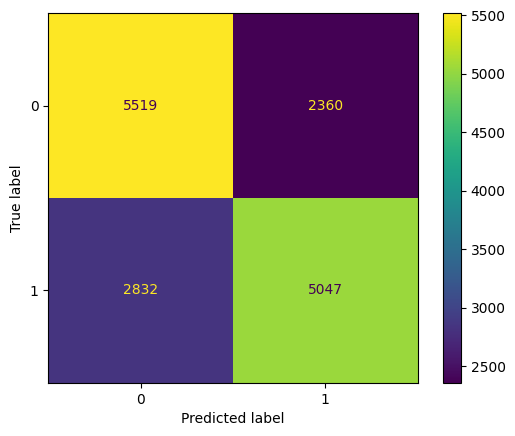

In [ ]:
# https://stackoverflow.com/questions/59165149/plot-confusion-matrix-with-scikit-learn-without-a-classifier

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(df['actual_label'], df['predicted_RF'])
display_labels = ["0", "1"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp = disp.plot(values_format='.0f')
plt.show()

La matriz de confusión también se puede normalizar. El parámetro `normalize` permite informar relaciones en lugar de recuentos. La matriz de confusión se puede normalizar de 3 formas diferentes: `'pred'`, `'true'` y `'all'`, que dividirán los recuentos por la suma de cada columna, fila o toda la matriz, respectivamente.

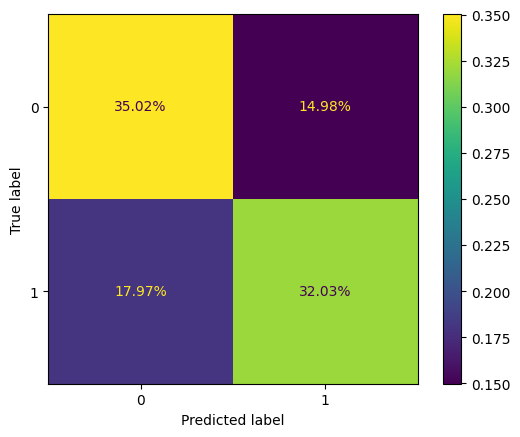

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(df['actual_label'], df['predicted_RF'], normalize='all')
display_labels = ["0", "1"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp = disp.plot(values_format='.2%')
plt.show()

## Precisión

La [precisión](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score) es intuitivamente la capacidad del clasificador para no etiquetar como positiva una muestra que es negativa. Se puede calcular utilizando `precision_score()`:


In [ ]:
from sklearn.metrics import precision_score

print(precision_score(df['actual_label'], df['predicted_RF']))
print(my_precision_score(df['actual_label'], df['predicted_RF']))

0.681382476036182
0.681382476036182


## Recall

El recall se refiere intuitivamente a la capacidad del clasificador para encontrar todas las muestras positivas. Se puede calcular utilizando recall_score():


In [ ]:
from sklearn.metrics import recall_score

print(recall_score(df['actual_label'], df['predicted_RF']))
print(my_recall_score(df['actual_label'], df['predicted_RF']))

0.6405635232897576
0.6405635232897576


## F1 Score

[`f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) calcula el puntaje F1, también conocido como puntuación F equilibrada o medida F. El puntaje F1 se puede interpretar como un promedio ponderado de la precisión y el recall, donde un puntaje F1 alcanza su mejor valor en 1 y su peor puntaje en 0.

In [ ]:
from sklearn.metrics import f1_score

print(f1_score(df['actual_label'], df['predicted_RF']))
print(my_f1_score(df['actual_label'], df['predicted_RF']))

0.660342797330891
0.660342797330891


## Informe de clasificación

La función [`classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) construye un informe de texto que muestra las principales métricas de clasificación.

- El recall significa "cuántos de esta clase encuentras sobre el número total de elementos de esta clase"
- La precisión será "cuántos se clasifican correctamente entre esa clase"
- El puntaje F1 es la media armónica entre la precisión y el recall
- El soporte es el número de ocurrencias de la clase dada en tu conjunto de datos

Aquí tienes un pequeño ejemplo con `target_names` personalizados.

In [ ]:
from sklearn.metrics import classification_report

target_names = ['class 0', 'class 1']
print(classification_report(df['actual_label'], df['predicted_RF'], target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.66      0.70      0.68      7879
     class 1       0.68      0.64      0.66      7879

    accuracy                           0.67     15758
   macro avg       0.67      0.67      0.67     15758
weighted avg       0.67      0.67      0.67     15758



- Para "class 0":
  - Precisión (precision): 0.66: Esto significa que el 66% de las muestras clasificadas como "class 0" son verdaderos positivos.
  - Recall: 0.70: Esto significa que se han encontrado el 70% de todas las muestras reales de "class 0".
  - Puntaje F1 (f1-score): 0.68: El puntaje F1 es una medida armónica entre la precisión y el recall, y tiene un valor de 0.68.
  - Soporte (support): 7879: Hay un total de 7879 muestras de "class 0" en el conjunto de datos.

- Para "class 1":
  - Precisión: 0.68: Esto significa que el 68% de las muestras clasificadas como "class 1" son verdaderos positivos.
  - Recall: 0.64: Esto significa que se han encontrado el 64% de todas las muestras reales de "class 1".
  - Puntaje F1: 0.66: El puntaje F1 es 0.66 para "class 1".
  - Soporte: 7879: Hay un total de 7879 muestras de "class 1" en el conjunto de datos.

- Exactitud (accuracy): 0.67: Esto indica que el modelo ha realizado correctamente el 67% de todas las predicciones en el conjunto de datos.

- Promedio general (macro avg): Los promedios ponderados de todas las métricas son del 67%. Esto proporciona una visión general del rendimiento del modelo.

- Promedio ponderado (weighted avg): Los promedios ponderados de todas las métricas también son del 67%. Esto proporciona un promedio ponderado del rendimiento del modelo, que tiene en cuenta el desequilibrio de clases.

En resumen, el modelo tiene un rendimiento relativamente similar en ambas clases, con precisiones y recalls cercanos al 0.67 y puntajes F1 en el rango de 0.66 a 0.68. La exactitud general del modelo es del 67%.

## Curvas ROC

Hasta ahora, hemos establecido un umbral de `0.5` para seleccionar qué muestras se predicen como positivas. Según este umbral, todas las métricas que hemos visto anteriormente se calculan en consecuencia. Además, este umbral se puede ajustar para ajustar el comportamiento del modelo para un problema específico.

Al hacer una predicción para un problema de clasificación binaria o de dos clases, los dos tipos de errores que podríamos cometer son: error de falso positivo y error de falso negativo. Al predecir probabilidades y calibrar un umbral, se puede establecer un equilibrio entre estos dos errores.

Una herramienta útil al predecir la probabilidad de un resultado binario es la curva Característica de Operación del Receptor, o curva ROC.

[`roc_curve()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) calcula la característica de operación del receptor (ROC). Esta implementación está restringida a la tarea de clasificación binaria.

Es un gráfico de la **tasa de falsos positivos** (eje x) versus la **tasa de verdaderos positivos** (eje y) para una serie de valores de umbral candidatos entre 0.0 y 1.0.

- La tasa de verdaderos positivos también se conoce como sensibilidad.
- La tasa de falsos positivos también se conoce como la especificidad invertida (1 - especificidad).

Un espacio ROC está definido por FPR y TPR como ejes x e y, respectivamente, que representan los compromisos relativos entre verdaderos positivos (beneficios) y falsos positivos (costos). Dado que TPR es equivalente a sensibilidad y FPR es igual a 1 - especificidad, el gráfico ROC a veces se denomina gráfico de sensibilidad vs (1 - especificidad).


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/36/Roc-draft-xkcd-style.svg/500px-Roc-draft-xkcd-style.svg.png">

Algunas notas de la figura mostrada anteriormente:

- El método de predicción más adecuado daría un punto en la esquina superior izquierda o coordenada (0,1) del espacio ROC, que representa una sensibilidad del 100% (sin falsos negativos) y una especificidad del 100% (sin falsos positivos).

- Una suposición aleatoria daría un punto a lo largo de una línea diagonal (la llamada línea de no discriminación) desde las esquinas inferiores izquierda hasta las superiores derecha (independientemente de las tasas de base positivas y negativas).

- La diagonal divide el espacio ROC.
 - Los puntos por encima de la diagonal representan buenos resultados de clasificación (mejores que aleatorios).
 - Los puntos por debajo de la línea representan malos resultados (peores que aleatorios). Se debe tener en cuenta que la salida de un predictor consistentemente malo simplemente se podría invertir para obtener un buen predictor.

Además, el cálculo del área bajo la curva ROC (ROC AUC) se puede calcular utilizando la función [`roc_auc_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html).


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(df["actual_label"], df["model_RF"])
print(roc_auc_score(df["actual_label"], df["model_RF"]))
print(fpr, tpr, thresholds)

0.73829514083596
[0.        0.        0.        ... 0.9941617 0.9941617 1.       ] [0.00000000e+00 1.26919660e-04 5.33062571e-03 ... 9.99873080e-01
 1.00000000e+00 1.00000000e+00] [1.93052053 0.93052053 0.82363091 ... 0.25654616 0.25587275 0.17142947]


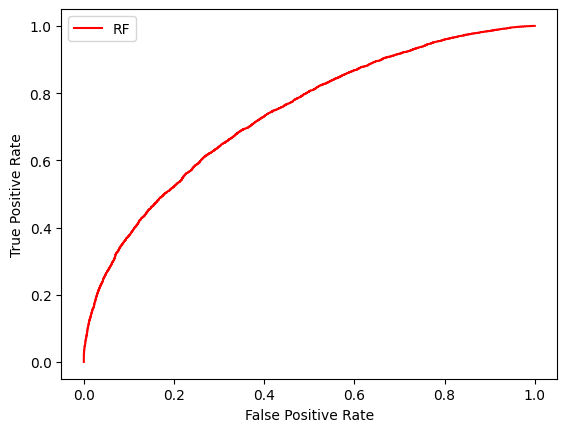

In [ ]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr,'r-',label = 'RF')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
!pip install -U scikit-learn

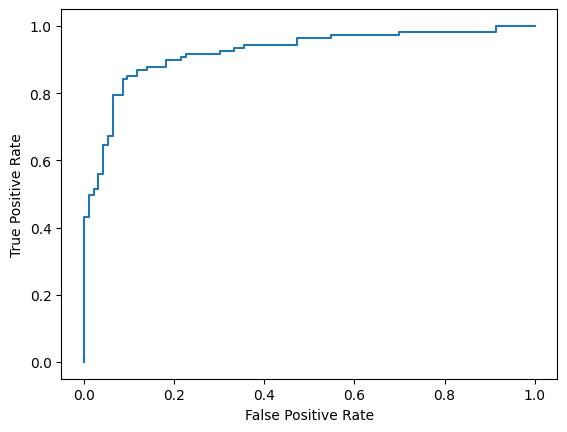

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import RocCurveDisplay, roc_curve
import matplotlib.pyplot as plt

# Generar datos simulados
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el clasificador y ajustarlo
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Calcular la curva ROC
probs = classifier.predict_proba(X_test)
probs = probs[:, 1]  # Probabilidades de la clase positiva
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Crear el objeto de la curva ROC
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.show()



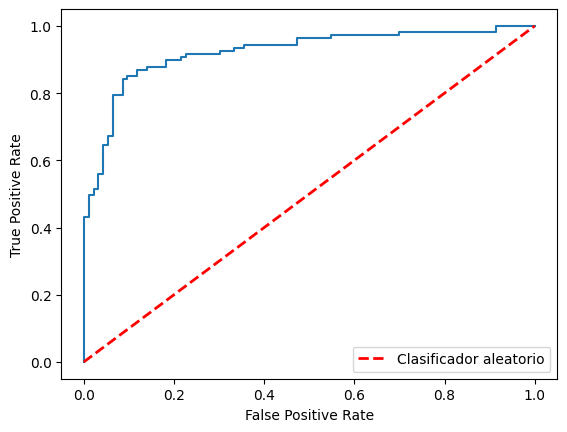

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import RocCurveDisplay, roc_curve
import matplotlib.pyplot as plt

# Generar datos simulados
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el clasificador y ajustarlo
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Calcular la curva ROC
probs = classifier.predict_proba(X_test)
probs = probs[:, 1]  # Probabilidades de la clase positiva
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Crear el objeto de la curva ROC
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

# Agregar la línea del clasificador aleatorio
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Clasificador aleatorio')

# Mostrar la leyenda y el gráfico
plt.legend(loc='lower right')
plt.show()


Un umbral alto resulta en un punto en la parte inferior izquierda. Un umbral bajo resulta en un punto en la parte superior derecha. Esto significa que al disminuir el umbral obtienes una TPR más alta a costa de un FPR más alto.

## Precision-Recall Curves

La precisión y la recuperación se pueden calcular para umbrales utilizando la función [precision_recall_curve()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html), que toma como entrada los valores de salida verdaderos y las probabilidades para la clase positiva, y devuelve los valores de precisión, recuperación y umbral.

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(df["actual_label"], df["model_RF"])

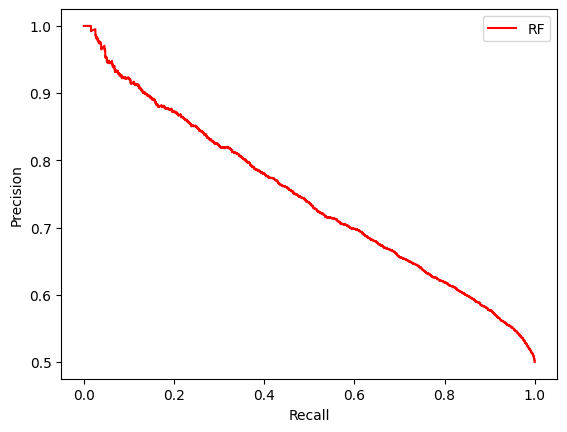

In [ ]:
import matplotlib.pyplot as plt

plt.plot(recall, precision, 'r-',label = 'RF')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

La curva de precisión-recuperación (PRC) muestra el compromiso entre la precisión y la recuperación para diferentes umbrales. Un área grande bajo la curva representa tanto una alta recuperación como una alta precisión, donde una alta precisión se relaciona con una baja tasa de falsos positivos y una alta recuperación se relaciona con una baja tasa de falsos negativos.

Generalmente, el uso de las curvas ROC y las curvas de precisión-recuperación es el siguiente:

- Las curvas ROC deben usarse cuando hay aproximadamente el mismo número de observaciones para cada clase.
- Las curvas de precisión-recuperación deben usarse cuando hay un desequilibrio moderado a grande de clases.

La razón de esta recomendación es que las curvas ROC presentan una imagen optimista del modelo en conjuntos de datos con un desequilibrio de clases.

# Comparación con clasificadores Ingenuos

[DummyClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html) es un clasificador que hace predicciones utilizando reglas simples. Este clasificador es útil como referencia básica para comparar con otros clasificadores (reales). No lo utilices para problemas reales.


In [ ]:
pip install --upgrade scikit-learn

In [ ]:
import numpy as np
from sklearn.dummy import DummyClassifier

In [ ]:
import numpy as np
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(random_state=42)

X = np.zeros((df.shape[0], 1))  # Corrección en la dimensión de la matriz de características
dummy_clf.fit(X, df["actual_label"])  # Asumiendo que "df" es el nombre de tu DataFrame



DummyClassifier(random_state=42)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr_dummy, tpr_dummy, thresholds_dummy = roc_curve(df["actual_label"], dummy_clf.predict(X))

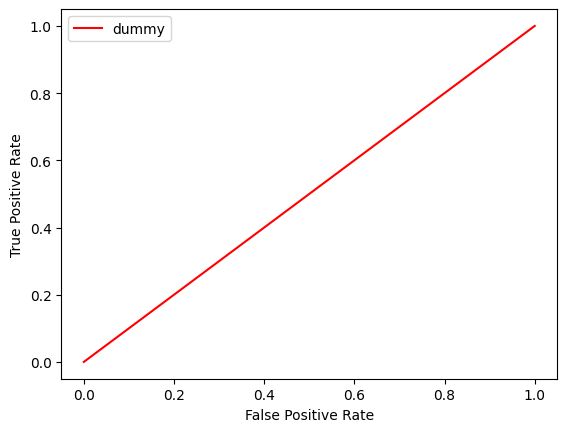

In [ ]:
import matplotlib.pyplot as plt

plt.plot(fpr_dummy, tpr_dummy,'r-',label = 'dummy')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Conclusiones

En este cuaderno, hemos visto algunas de las métricas que proporciona scikit-learn para la clasificación y también hemos escrito nuestras propias funciones desde cero. Más específicamente, hemos visto cómo calcular: precisión, exactitud equilibrada, matriz de confusión, precisión, recuperación, puntuación F1, y también algunas funcionalidades interesantes como el informe de clasificación, curvas ROC, curvas de precisión-recuperación y clasificadores ficticios.

Finalmente, siéntete libre de revisar estos interesantes tutoriales, de los cuales gran parte del contenido de este cuaderno se basa en ellos:

- [Métricas de rendimiento de ciencia de datos para todos](https://towardsdatascience.com/data-science-performance-metrics-for-everyone-4d68f4859eef)
- [Comprensión de las métricas de clasificación de ciencia de datos en Scikit-Learn en Python](https://towardsdatascience.com/understanding-data-science-classification-metrics-in-scikit-learn-in-python-3bc336865019)
- [Cómo utilizar curvas ROC y curvas de precisión-recuperación para la clasificación en Python](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/)


# **Ejemplo Paso a Paso ROC**

## **¿Cómo se calcula una curva ROC?**

Supongamos que tenemos un modelo de clasificación binaria que predice si un correo electrónico es spam (1) o no (0). A continuación se presenta una tabla con las verdaderas etiquetas y las probabilidades de predicción para cinco correos electrónicos de prueba:

```
| Correo | Etiqueta Real | Probabilidad de Predicción |
|--------|--------------|---------------------------|
|   1    |      0       |            0.2            |
|   2    |      1       |            0.4            |
|   3    |      1       |            0.6            |
|   4    |      0       |            0.7            |
|   5    |      1       |            0.9            |
```

Para calcular la curva ROC, primero ordenamos las predicciones de manera descendente según las probabilidades de predicción:

```
| Correo | Etiqueta Real | Probabilidad de Predicción |
|--------|--------------|---------------------------|
|   5    |      1       |            0.9            |
|   4    |      0       |            0.7            |
|   3    |      1       |            0.6            |
|   2    |      1       |            0.4            |
|   1    |      0       |            0.2            |
```

Luego, se calcula la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR) para cada umbral:

- Con umbral 0.9: TPR = 1/2 = 0.5 y FPR = 0/3 = 0.
- Con umbral 0.7: TPR = 2/2 = 1 y FPR = 1/3 = 0.33.
- Con umbral 0.6: TPR = 3/2 = 1.5 y FPR = 1/3 = 0.33.
- Con umbral 0.4: TPR = 4/2 = 2 y FPR = 1/3 = 0.33.
- Con umbral 0.2: TPR = 4/2 = 2 y FPR = 2/3 = 0.66.

Estos valores se utilizan para trazar la curva ROC en un gráfico con TPR en el eje y y FPR en el eje x. La curva ROC mostrará la relación entre la tasa de verdaderos positivos y la tasa de falsos positivos a medida que se varía el umbral de clasificación.